In [1]:
from tiles import *

In [2]:
v1 = Vertex([0,0], 'w')
v2 = Vertex([0,4], 'w')
print(v1)
print(v1==v2)
v2.colour = 'b'
print(v1==v2)

White vertex at [0.0, 0.0]
False
False


In [3]:
v = Vector([0,1])
v

[0.0, 1.0]

In [4]:
list(v)

[0.0, 1.0]

In [5]:
e = Edge(v1, v2, 'g')

In [6]:
hash(e)

6678426013054745923

In [7]:
e.vertices

(White vertex at [0.0, 0.0], Black vertex at [0.0, 4.0])

In [8]:
print(v1 in e)
v1.colour='w'
print(v1 in e)

True
True


In [9]:
x = [v1, v2]

In [10]:
len(set(x))

2

In [11]:
print(e.white_vertex)

White vertex at [0.0, 0.0]


In [12]:
math.cos(math.pi/6)

0.8660254037844387

In [13]:
v1.coords

(0.0, 0.0)

In [14]:
k = Kite(e)

In [15]:
k.edges

(Green edge between (0.0, 0.0) and (0.0, 4.0),
 Red edge between (0.0, 4.0) and (-2.351141009169892, 3.2360679774997894),
 Red edge between (-2.351141009169892, 3.2360679774997894) and (-3.804226065180614, 1.2360679774997898),
 Green edge between (-3.804226065180614, 1.2360679774997898) and (0.0, 0.0))

In [16]:
e1 = Edge(v1, v2, 'r')
k1 = Kite(e1)
k1.edges

(Red edge between (0.0, 0.0) and (0.0, 4.0),
 Green edge between (0.0, 4.0) and (-6.155367074350506, 2.0000000000000004),
 Green edge between (-6.155367074350506, 2.0000000000000004) and (-2.351141009169893, -3.2360679774997894),
 Red edge between (-2.351141009169893, -3.2360679774997894) and (0.0, 0.0))

In [17]:
k2 = BetterKite(e1)
k2.edges

(Red edge between (0.0, 0.0) and (0.0, 4.0),
 Green edge between (0.0, 4.0) and (-6.155367074350506, 2.0000000000000004),
 Green edge between (-6.155367074350506, 2.0000000000000004) and (-2.351141009169893, -3.2360679774997894),
 Red edge between (-2.351141009169893, -3.2360679774997894) and (0.0, 0.0))

In [18]:
d1 = Dart(e1)
d1.edges

(Red edge between (0.0, 0.0) and (0.0, 4.0),
 Red edge between (0.0, 4.0) and (2.351141009169893, 7.23606797749979),
 Green edge between (2.351141009169893, 7.23606797749979) and (-3.440954801177933, 5.118033988749894),
 Green edge between (-3.440954801177933, 5.118033988749894) and (0.0, 0.0))

In [19]:
d2 = Dart(e)
d2.edges

(Green edge between (0.0, 0.0) and (0.0, 4.0),
 Red edge between (0.0, 0.0) and (1.4530850560107218, 2.0),
 Red edge between (1.4530850560107218, 2.0) and (3.804226065180614, 2.76393202250021),
 Green edge between (3.804226065180614, 2.76393202250021) and (0.0, 4.0))

In [20]:
v1.rotate_vector(v2/4, math.pi) +v2/4 == Vector([0,0])

False

In [21]:
#THIS IS AN IMPORTANT PROBLEM!! We need differences to be not too precise, more leninet 10*-10 = 0

In [22]:
hash(k)

-7070580992820677124

In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_vertex(ax, v):
    x, y = v.coords
    c = 'bo' if v.colour == 'b' else 'yo'
    ax.plot(x,y,c)
    
def plot_edge(ax, e, with_vertices=False):
    v1, v2 = e.vertices
    x = [v1[0], v2[0]]
    y = [v1[1], v2[1]]
    if with_vertices:
        for v in e.vertices: plot_vertex(ax,v)
    ax.plot(x,y,e.colour)
    
def plot_tile(ax,tile):
    for e in tile.edges: plot_edge(ax,e)
    for v in tile.vertices: plot_vertex(ax,v)

In [25]:
def prep_ax():
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    return ax

def show_tile(tile):
    ax = prep_ax()
    plot_tile(ax,tile)
    plt.show()
    
def show_tiles(tile_list):
    ax = prep_ax()
    for tile in tile_list: plot_tile(ax,tile)
    plt.show()

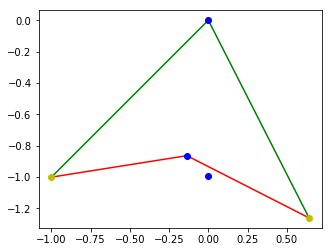

Vertex to the left of:
Edge 1: False
Edge 2: False
Edge 3: True
Edge 4: True
Vertex on:
Edge 1: False
Edge 2: False
Edge 3: False
Edge 4: False
Tiles covers point: False


In [40]:
ax = prep_ax()
test_v = Vertex([-0,-.99], 'b')
test_e = Edge(Vertex([-0,0],'b'), Vertex([-1,-1],'w'),'g')
test_t =  Dart(test_e)
plot_vertex(ax,test_v)
plot_tile(ax, test_t)
plt.show()
print('Vertex to the left of:')
for i in range(4):
    text = 'Edge '+str(i+1)+': '+str((test_t.edges)[i].to_the_right(test_v))
    print(text)
print('Vertex on:')
for i in range(4):
    text = 'Edge '+str(i+1)+': '+str((test_t.edges)[i].contains_point(test_v))
    print(text)
print('Tiles covers point: '+str(test_t.covers(test_v)))

In [27]:
Edge(Vertex([-0,0],'b'), Vertex([1,0],'w'),'g') == Edge(Vertex([-4,0],'b'), Vertex([1,0],'w'),'g')

False

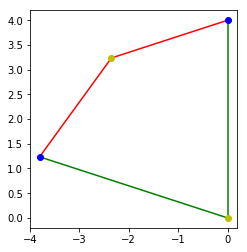

In [28]:
show_tile(k)

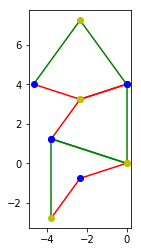

In [29]:
show_tiles([k, Kite(k.edges[1],False), Dart(k.edges[3],True)])

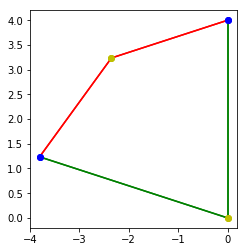

In [30]:
show_tiles([k, Kite(k.edges[1],True)])

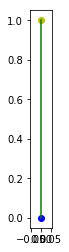

In [31]:
e1 = Edge(Vertex([0,0],'b'), Vertex([0,1],'w'), 'g')
plot_edge(prep_ax(),e1, True)
plt.show()

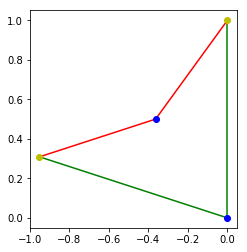

In [32]:
d1=Dart(e1)
show_tile(d1)

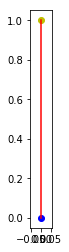

In [33]:
e2 = Edge(Vertex([0,0],'b'), Vertex([0,1],'w'), 'r')
plot_edge(prep_ax(),e2, True)
plt.show()

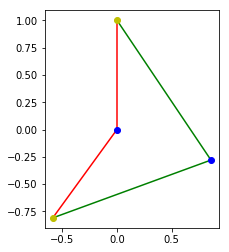

In [34]:
d2=Dart(e2)
show_tile(d2)

In [35]:
-math.tan(0.3*math.pi)

-1.3763819204711731

In [36]:
-math.tan(0.1*math.pi)

-0.3249196962329063

In [37]:
range(5)

range(0, 5)

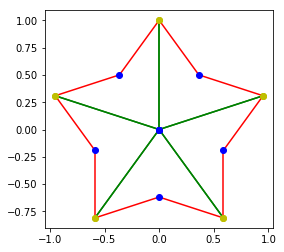

In [38]:
show_tiles(star(e1))

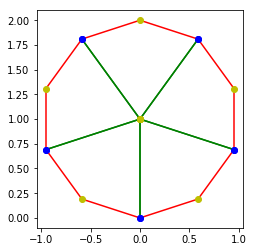

In [39]:
show_tiles(sun(e1))